In [2]:
import pandas as pd

In [16]:
df=pd.read_csv("titanic.csv")

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
data=df[['Survived','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]

In [33]:
data.Cabin.isnull().sum()
# some many nan

687

In [34]:
data=df[['Survived','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']]

In [35]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

In [36]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


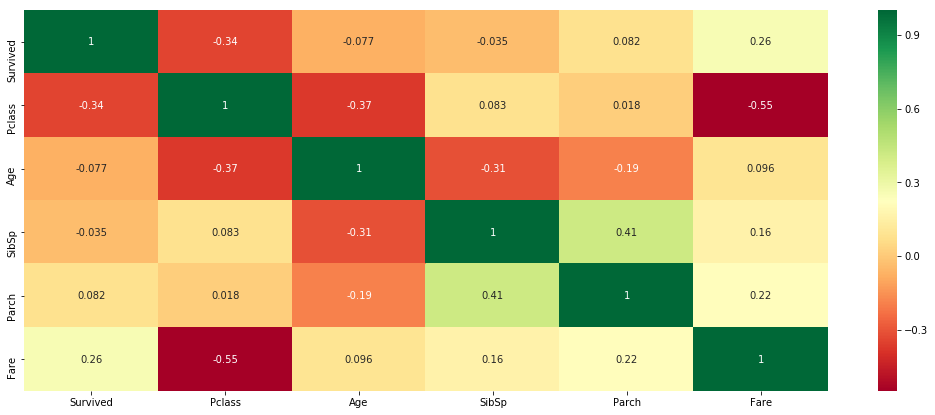

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 7)
def titanic_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
titanic_corr(data)

In [42]:
data.Sex = data.Sex.map({'male': 1, 'female': 2})

C:\Users\jannett chabbeh\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [43]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,2,38.0,1,0,PC 17599,71.2833,C
2,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,2,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S


In [47]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [59]:
data.Embarked.isnull().sum()

0

In [49]:
data.Age = data.Age.fillna(data.Age.mean())


In [57]:
data=data[data.Embarked.isnull()==0]

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Embarked'] = le.fit_transform(data['Embarked'])

In [61]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,2,38.0,1,0,PC 17599,71.2833,0
2,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,2,35.0,1,0,113803,53.1000,2
4,0,3,1,35.0,0,0,373450,8.0500,2


In [69]:
y= data.Survived
x = data.drop(['Survived','Ticket'],axis='columns')

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [72]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [73]:
model.score(X_test,y_test)

0.7471910112359551

In [78]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())


InvocationException: Program terminated with status: 10072. stderr follows: warning, language png not recognized, use one of:
 dot canon plain plain-ext
graph parser: parse error near line 4
context:  0 [fillcolor="#f5d0b5", >>>  label=< <<< X<SUB>1</SUB> &le; 1.5<br/>gini = 0.474<br/>samples = 711<br/>value = [437, 274]>];


In [80]:
# Create DOT data
dot_data = tree.export_graphviz(model)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

warning, language png not recognized, use one of:
 dot canon plain plain-ext



In [81]:
graph.write_png("iris.png")

warning, language png not recognized, use one of:
 dot canon plain plain-ext



True